In [1]:
# Importing Packages
import os
import numpy as np
import pandas as pd

# Importing more packages but these are to help with visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

import kagglehub

# This code makes the plots appear inside the notebook
%matplotlib inline
output_notebook()

# Downloading from Kaggle
path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)

os.listdir(path)


C:\Users\ambsc\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading BokehJS ...

100%|█████████████████████████████████████████████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 9.38MB/s]

Extracting files...


Path to dataset files: C:\Users\ambsc\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


['insurance.csv']

In [6]:
# Reading and previewing the insurance data set
df = pd.read_csv(os.path.join(path, "insurance.csv"))

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# This gives basic info about the dataset
print("Dataset Info:")
print(df.info())

# This checks for missing values
print("\nMissing Values:")
print(df.isna().sum())

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())

# This gives value counts for categorical columns
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.0

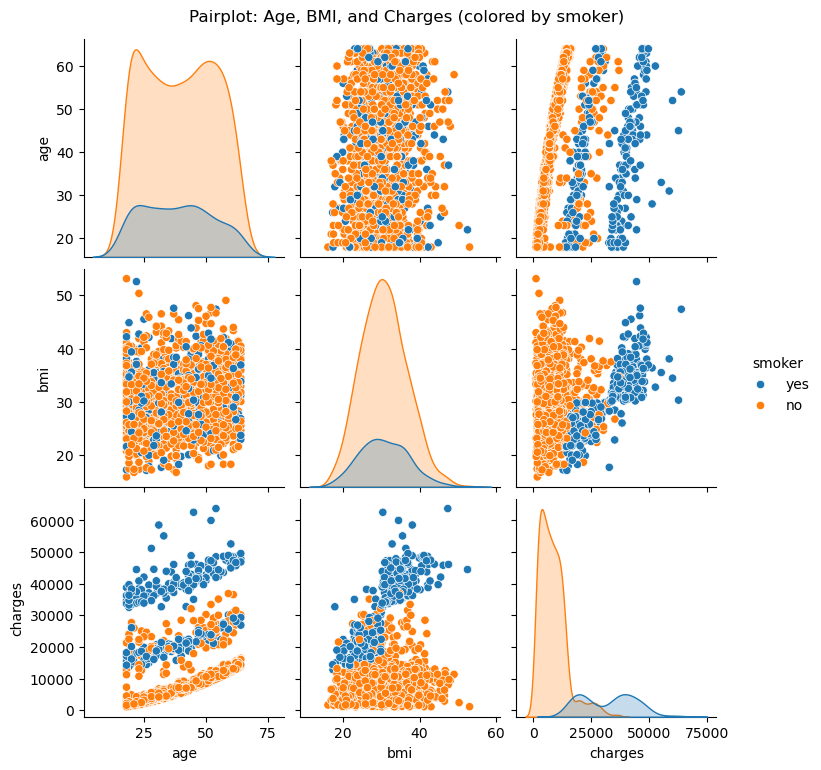

In [15]:
# This helps visualize relationships between numeric features
sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker', diag_kind='kde')
plt.suptitle("Pairplot: Age, BMI, and Charges (colored by smoker)", y=1.02)
plt.show()


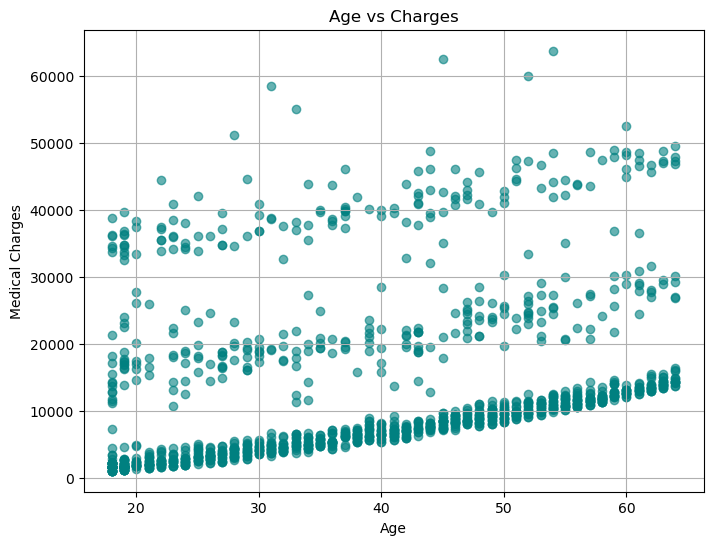

In [9]:
# This gives us Age vs Charges
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['charges'], alpha=0.6, color='teal')
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.grid(True)
plt.show()

# - Charges increase with age.
# - Smokers are more likely to form the upper cluster of high charges.


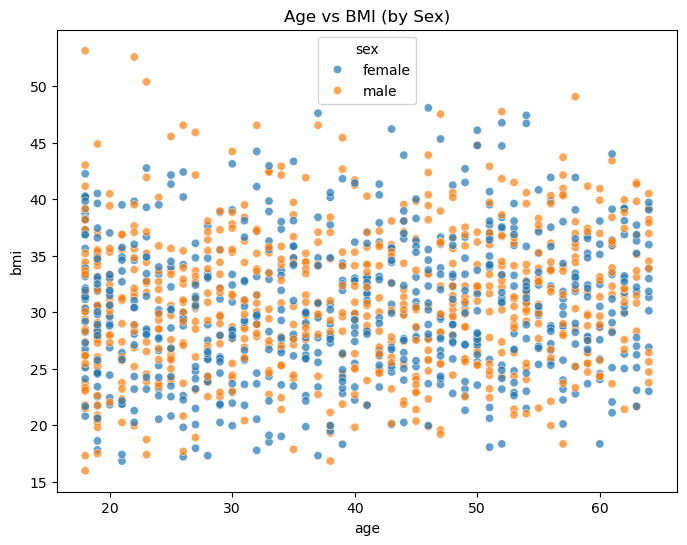

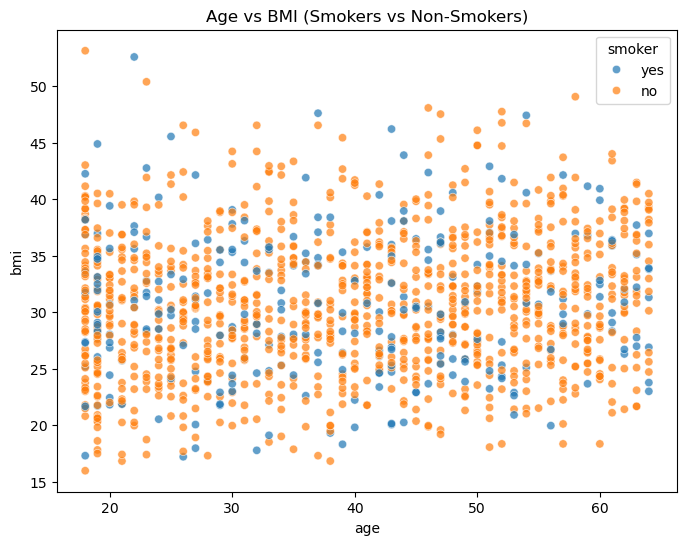

In [10]:
# This gives Age vs BMI 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='bmi', hue='sex', alpha=0.7)
plt.title("Age vs BMI (by Sex)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', alpha=0.7)
plt.title("Age vs BMI (Smokers vs Non-Smokers)")
plt.show()

# - There is no clear correlation between BMI and age.


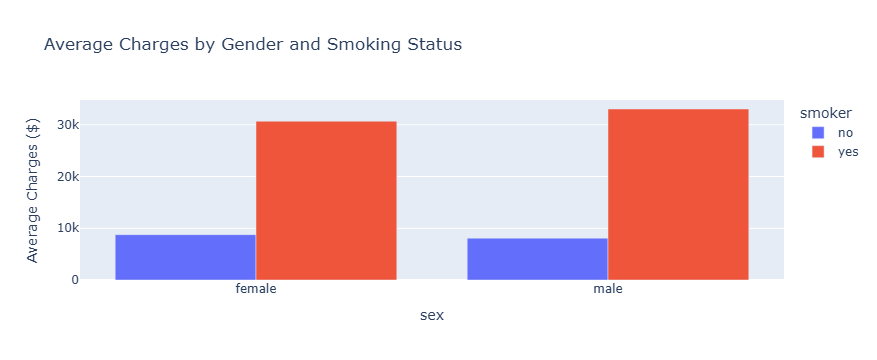

In [11]:
# This gives the Average Charges by Gender and Smoking Status
avg_charges = df.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

fig = px.bar(
    avg_charges,
    x='sex',
    y='charges',
    color='smoker',
    barmode='group',
    title='Average Charges by Gender and Smoking Status',
    labels={'charges': 'Average Charges ($)'}
)
fig.show()

# - Male and female smokers are charged a lot more than non-smokers.
# - Smoking effects don't differ as much between genders.


C:\Users\ambsc\AppData\Local\Temp\ipykernel_14896\861687320.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



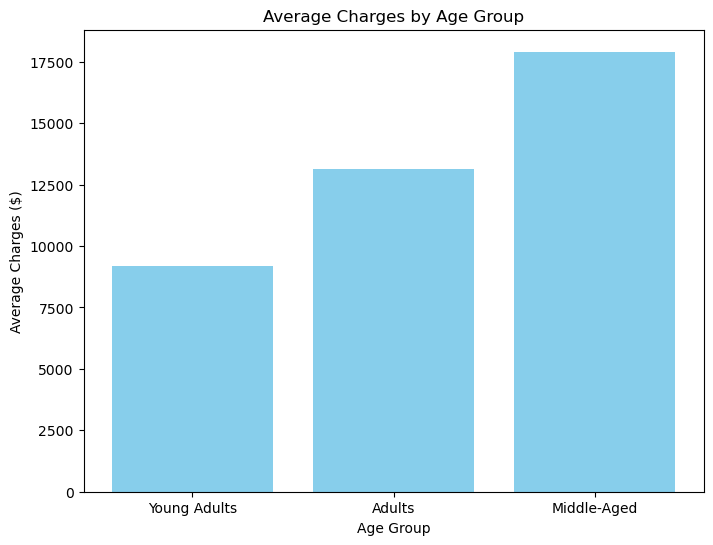

In [12]:
# This gives us Charges by Age Groups 

# This code deefines age bins and labels
bins = [0, 18, 30, 50, 65, 100]
labels = ['Children', 'Young Adults', 'Adults', 'Middle-Aged', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# This compute mean charges for each age group
age_charges = df.groupby('age_group')['charges'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(age_charges['age_group'], age_charges['charges'], color='skyblue')
plt.title("Average Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Charges ($)")
plt.show()

# - Charges increase with age.
# - Elderly people have the highest medical costs.


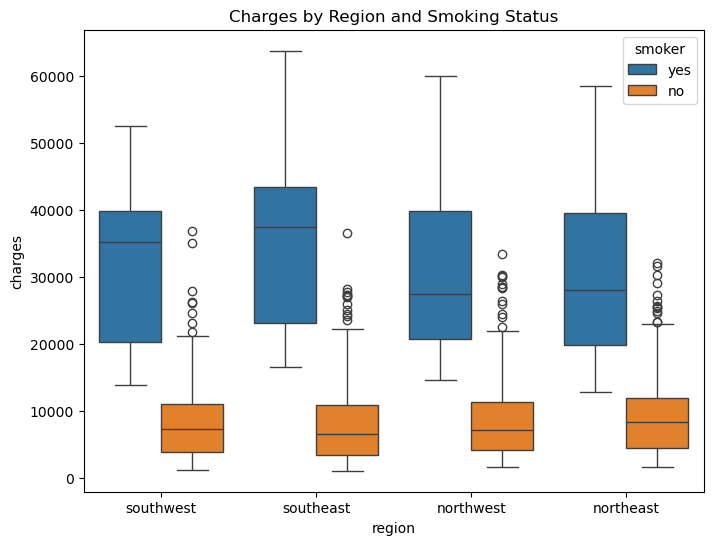

In [13]:
# This gives charges by region and smoking status
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.title("Charges by Region and Smoking Status")
plt.show()

# - In every region, smokers  have higher charges.
# - The 'southeast' region shows higher charges for smokers though not by a lot.


In [14]:
# This gives a Bokeh Plot on Age vs Charges
# --------------------------------
# Create an interactive Bokeh scatter plot
p = figure(title="Age vs Charges (Interactive Bokeh Plot)",
           x_axis_label='Age',
           y_axis_label='Charges',
           tools="pan,wheel_zoom,box_zoom,reset,hover")

# Add hover tooltips
hover = HoverTool(tooltips=[("Age", "@x"), ("Charges", "@y")])
p.add_tools(hover)

# Add scatter points
p.circle(df['age'], df['charges'], size=6, color="navy", alpha=0.5)
show(p)

# 📝 Comment:
# - The interactive plot allows you to hover over points to see actual values.
# - Makes it easier to identify outliers or clusters.


C:\Users\ambsc\AppData\Local\Temp\ipykernel_14896\1337054892.py:15: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

